In [2]:
import numpy as np
import pandas as pd
# pd.set_option("display.notebook_repr_html", False)  # disable "rich" output
# plt.style.use("seaborn")  # plot style

# sns.set_palette([  # the "R4" palette
#     "#000000", "#DF536B", "#61D04F", "#2297E6",
#     "#28E2E5", "#CD0BBC", "#F5C710", "#999999"
# ])

# plt.rcParams.update({
#     "font.size":         11,
#     "font.family":       "sans-serif",
#     "font.sans-serif":   ["Alegreya Sans", "Alegreya"],
#     "figure.autolayout": True,
#     "figure.dpi":        300,
#     "figure.figsize":    (6, 3.5),  # default is [8.0, 5.5],
# })

In [3]:
posts = pd.read_xml("apple/Posts.xml", parser = 'etree', )
# usunięcie wpisów NaN

In [4]:
# zmniejszenie wymiarów tabeli
posts = posts[['Id',"Body", 'Tags', 'CreationDate']]

In [157]:
# rodzaj alkoholu
def extractAlcohol(tags):
    if "beer" in tags:
        return 'beer'
    if "wine" in tags:
        return 'wine'
    if "cider" in tags:
        return 'cider'


posts["kind of alhocol"] = posts["Tags"].astype("string").apply(extractAlcohol)

In [158]:
# rok
posts["CreationDate"] = pd.to_datetime(posts['CreationDate'],format='%Y-%m-%d')
posts["Year"] = pd.DatetimeIndex(posts['CreationDate']).year
posts["Month"] = pd.DatetimeIndex(posts['CreationDate']).month
posts = posts.loc[:, ('Id', 'kind of alhocol', 'Year', 'Month')]

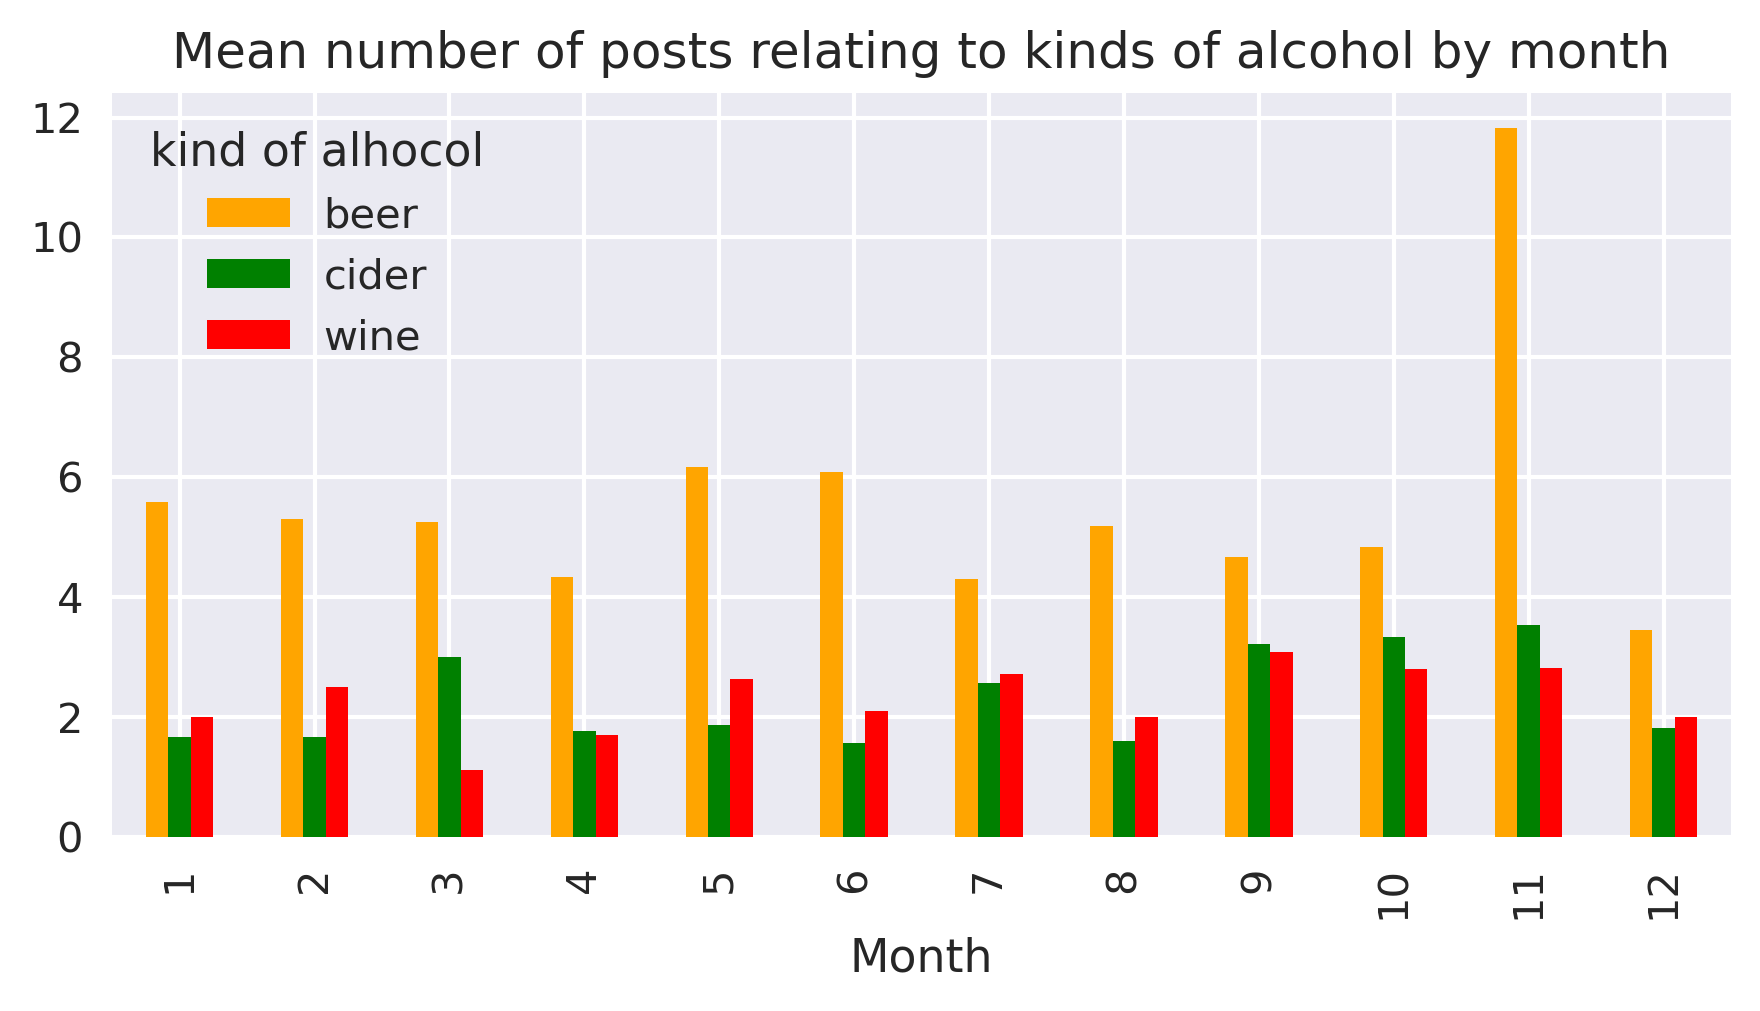

In [159]:
# srednia ilosc postó w miesiącu na przestrzeni lat
x = posts.groupby(["Year", "Month", "kind of alhocol"]).size()
x = x.reset_index()
x.rename( columns={0:'Count'}, inplace=True )
x = x.drop(columns=['Year'])
x = x.groupby(["Month", "kind of alhocol"]).mean()
x = x.unstack()
x.columns = x.columns.get_level_values(1)

x.plot(kind="bar", color=["orange", "green", "red"])
plt.title("Mean number of posts relating to kinds of alcohol by month")
plt.show()

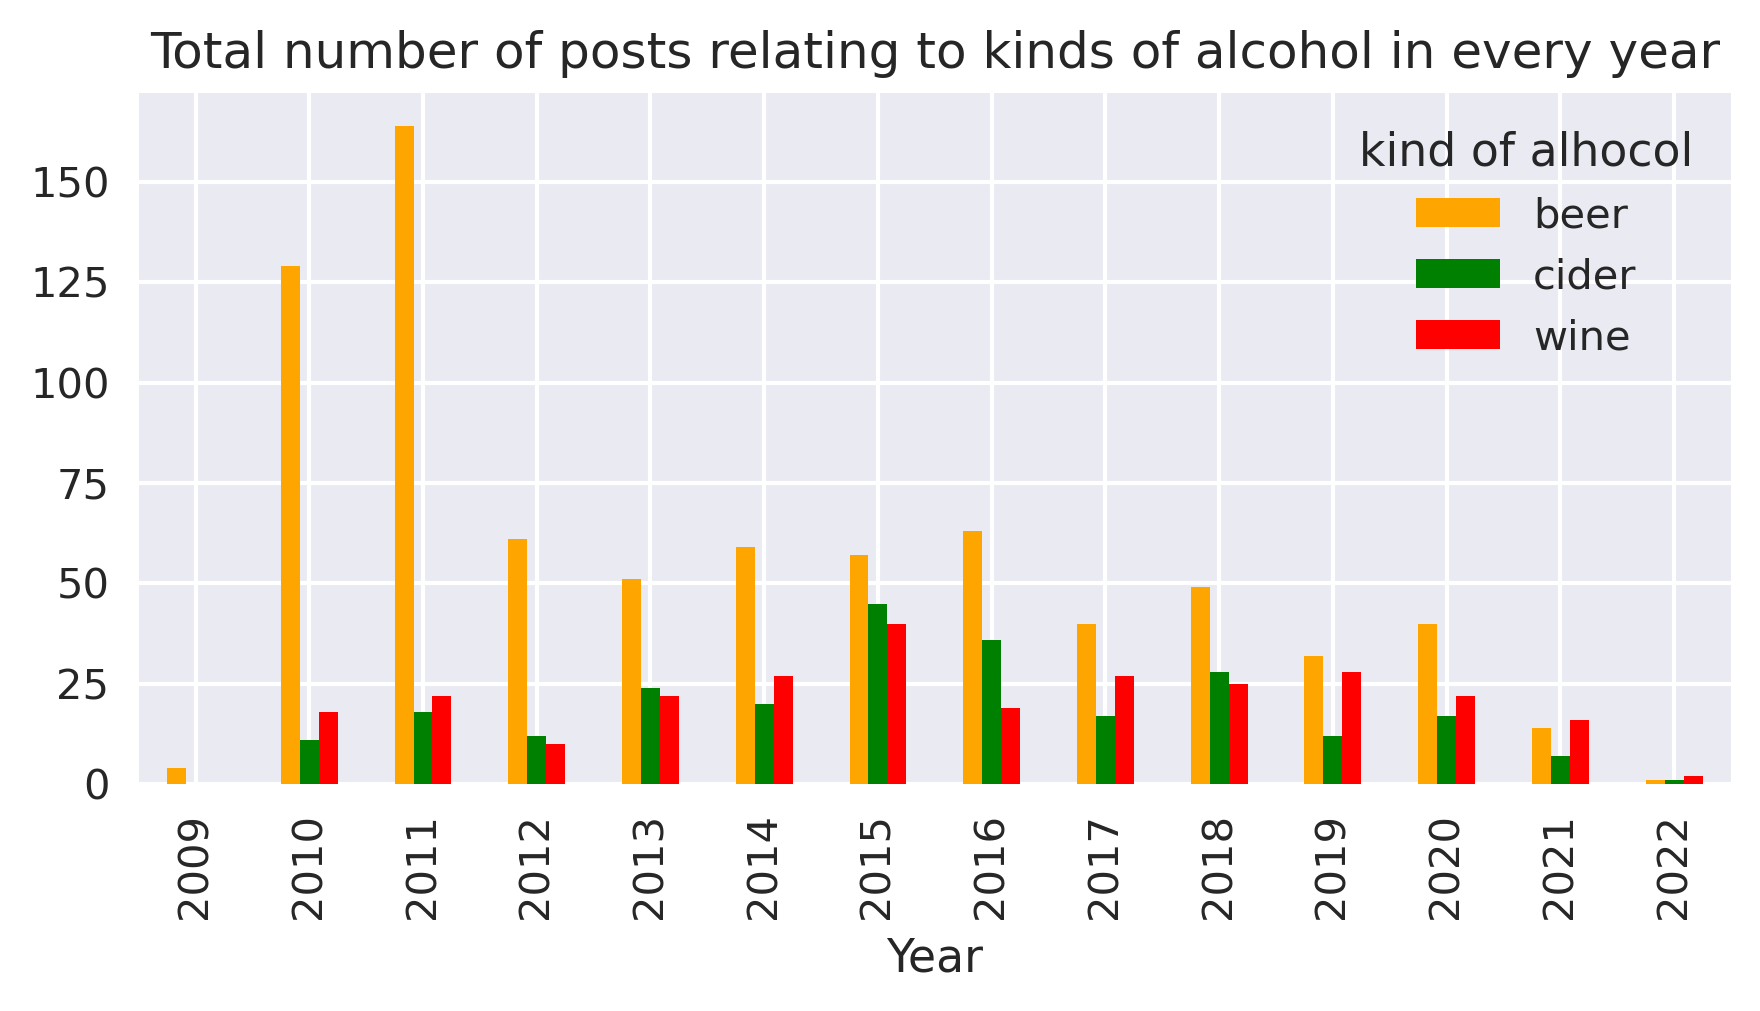

In [160]:
# ilosc postów na rok
x = posts.groupby(["Year", "kind of alhocol"]).size()
x = x.unstack()

x.plot(kind="bar", color=["orange", "green", "red"])
plt.title("Total number of posts relating to kinds of alcohol in every year")
plt.show()

In [161]:
# ogolnie ilosc postów od daty
posts = pd.read_xml("homebrew-data/Posts.xml", parser = 'etree')

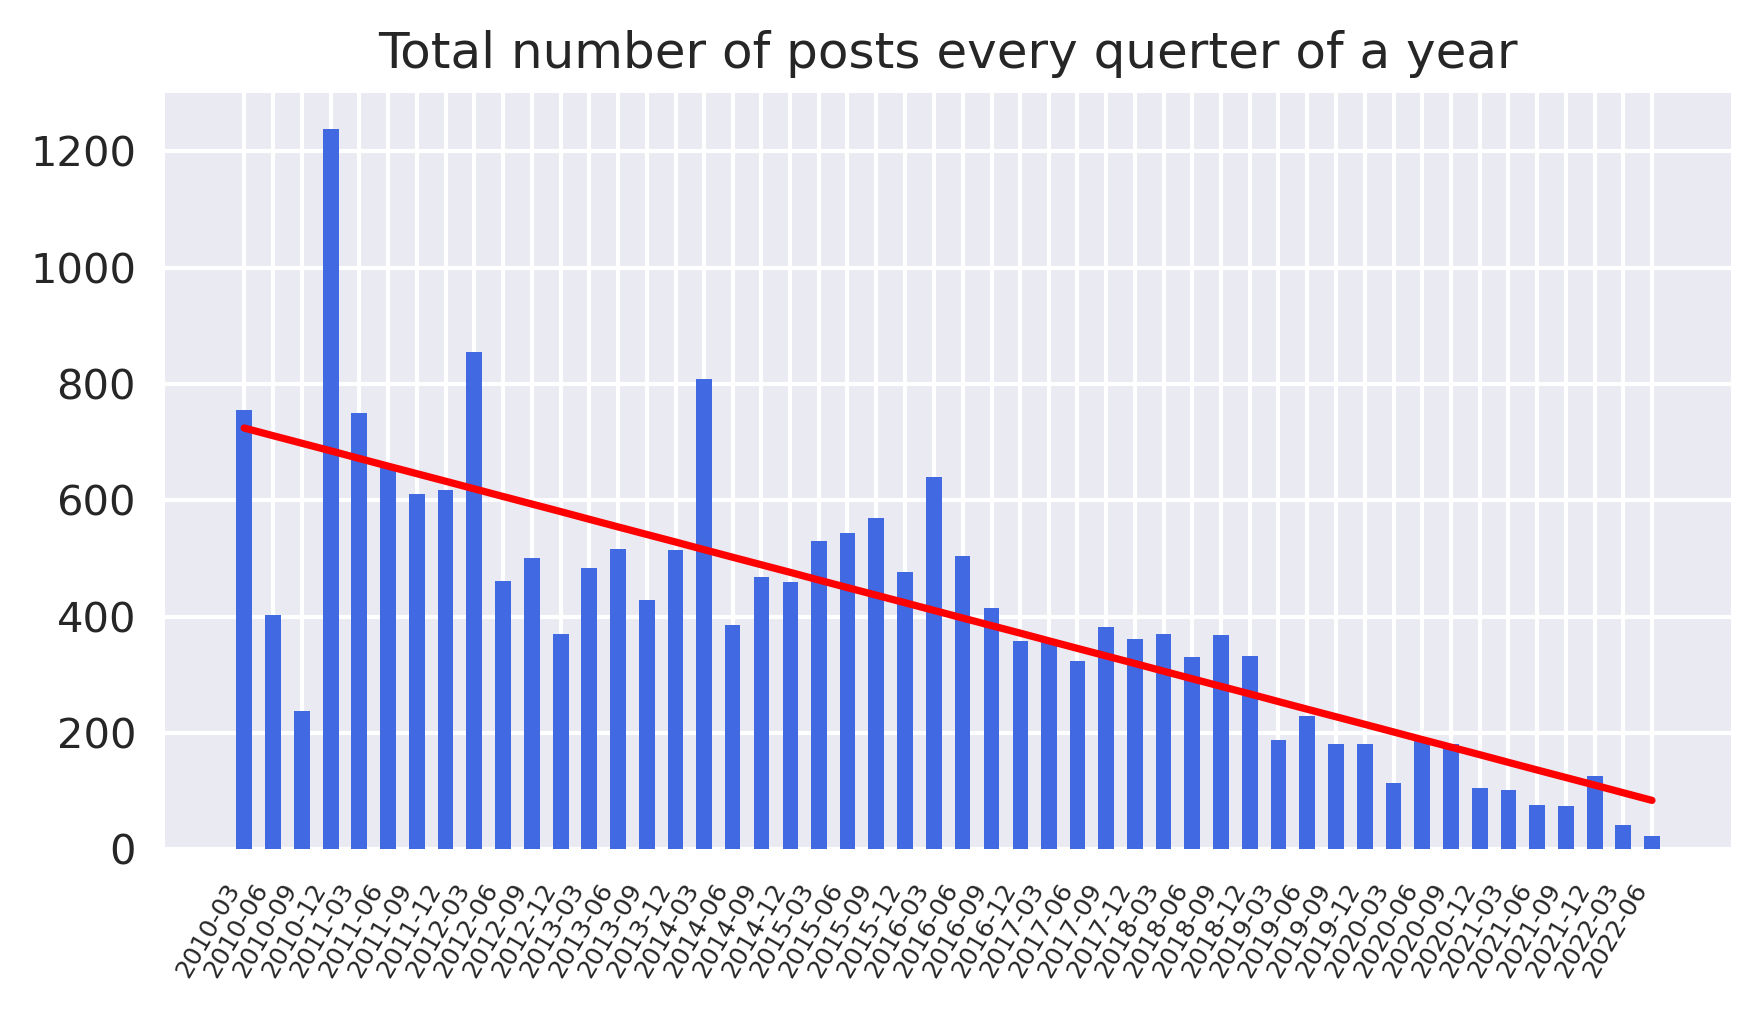

In [162]:

posts['CreationDateMonth'] = [datetime(int(date[0:4]), int(date[5:7]), 1) for date in posts.CreationDate]

grouped_df = posts.groupby(by=posts.CreationDateMonth)['Id'].count().reset_index()

grouped_df.rename(columns = {'CreationDateMonth':'Month', 'Id':'Count'}, inplace = True)
grouped_df.sort_values(by = "Month", ascending=True, inplace=True)

interval_df = grouped_df.resample('3m', on='Month').Count.sum()[1:].reset_index()

ab = np.polyfit(np.arange(len(interval_df)), interval_df.Count.to_numpy(), deg=1) 
linex = np.arange(len(interval_df))
line_fun = lambda x: ab[0]*x + ab[1]
plt.plot(interval_df['Month'], line_fun(linex), color='red')

plt.bar(interval_df['Month'], interval_df['Count'], width = 50, color='royalblue')
plt.xticks(interval_df['Month'], interval_df['Count'], rotation=60, fontsize='6', horizontalalignment='right')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title("Total number of posts every querter of a year")
plt.show()

### co sie stało z tym forum?
https://homebrew.meta.stackexchange.com/questions/486/what-happened-to-homebrewing

# Badanie skoku w 2010
Kto najczęciej zadawla pytania i kto najczesciej odpowiadał

In [163]:
posts = pd.read_xml("homebrew-data/Posts.xml", parser = 'etree')
users = pd.read_xml("homebrew-data/Users.xml", parser = 'etree')

In [164]:
posts["CreationDate"] = pd.to_datetime(posts['CreationDate'],format='%Y-%m-%d')
posts["Year"] = pd.DatetimeIndex(posts['CreationDate']).year
posts["Month"] = pd.DatetimeIndex(posts['CreationDate']).month
posts["Day"] = pd.DatetimeIndex(posts['CreationDate']).day
posts = posts[(posts.Month.isin(range(9,12+1))) & (posts.Year == 2010)]

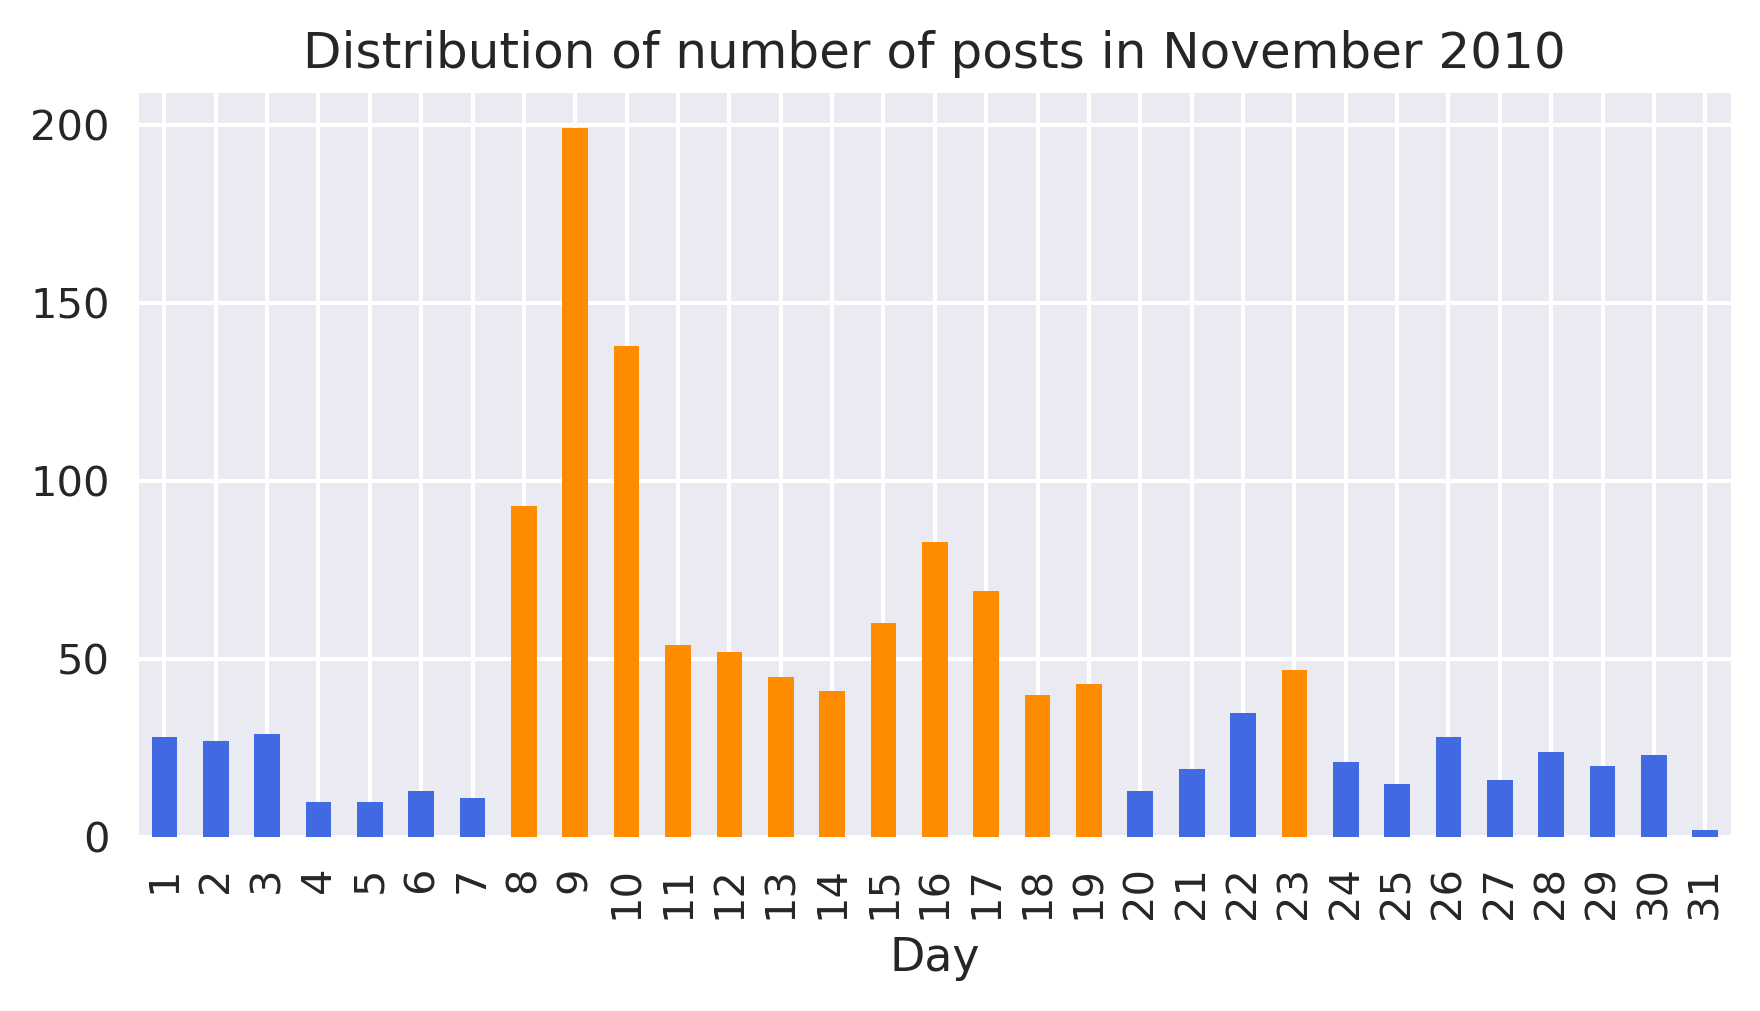

In [165]:
x = posts.groupby("Day").size()

col = []
for i in x.values: # keys are the names of the boys
    if i >= 40:
        col.append('darkorange')
    else:
        col.append('royalblue')

x.plot(kind="bar", color=col)
plt.title("Distribution of number of posts in November 2010")
plt.show()

## 8 listopada 2010 to byl start. Badanie nastepnych 10 dni bo widac ze też intensywne + porównanie z ogólnymi zależnościami

# ile bylo wtedy postow a ile odpowiedzi

In [166]:
# Pytania czy odpowiedzi
posts_all = pd.read_xml("homebrew-data/Posts.xml", parser = 'etree')
posts_high = posts[posts.Day.isin(range(8, 18+1))]
posts_high["Type of post"] = np.where(pd.isna(posts_high["ParentId"]), 'Question', "Answer")


C:\Users\01151576\AppData\Local\Temp\ipykernel_18576\837148430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_high["Type of post"] = np.where(pd.isna(posts_high["ParentId"]), 'Question', "Answer")


In [167]:
x_top = posts_high.groupby("Type of post")['Type of post'].count()
#x.plot.pie(colors=['lightblue', 'pink'], autopct = "%.2f%%")

In [168]:

posts_all["Type of post"] = np.where(pd.isna(posts_all["ParentId"]), 'Question', "Answer")
x_all = posts_all.groupby("Type of post")['Type of post'].count()
#x.plot.pie(colors=['royalblue', 'palevioletred'], autopct = "%.2f%%")

In [169]:
top_q_perc = 100 * x_top["Question"] / (x_top["Question"] + x_top["Answer"])
top_a_perc = 100 - top_q_perc
all_q_perc = 100 * x_all["Question"] / (x_all["Question"] + x_all["Answer"])
all_a_perc = 100 - all_q_perc

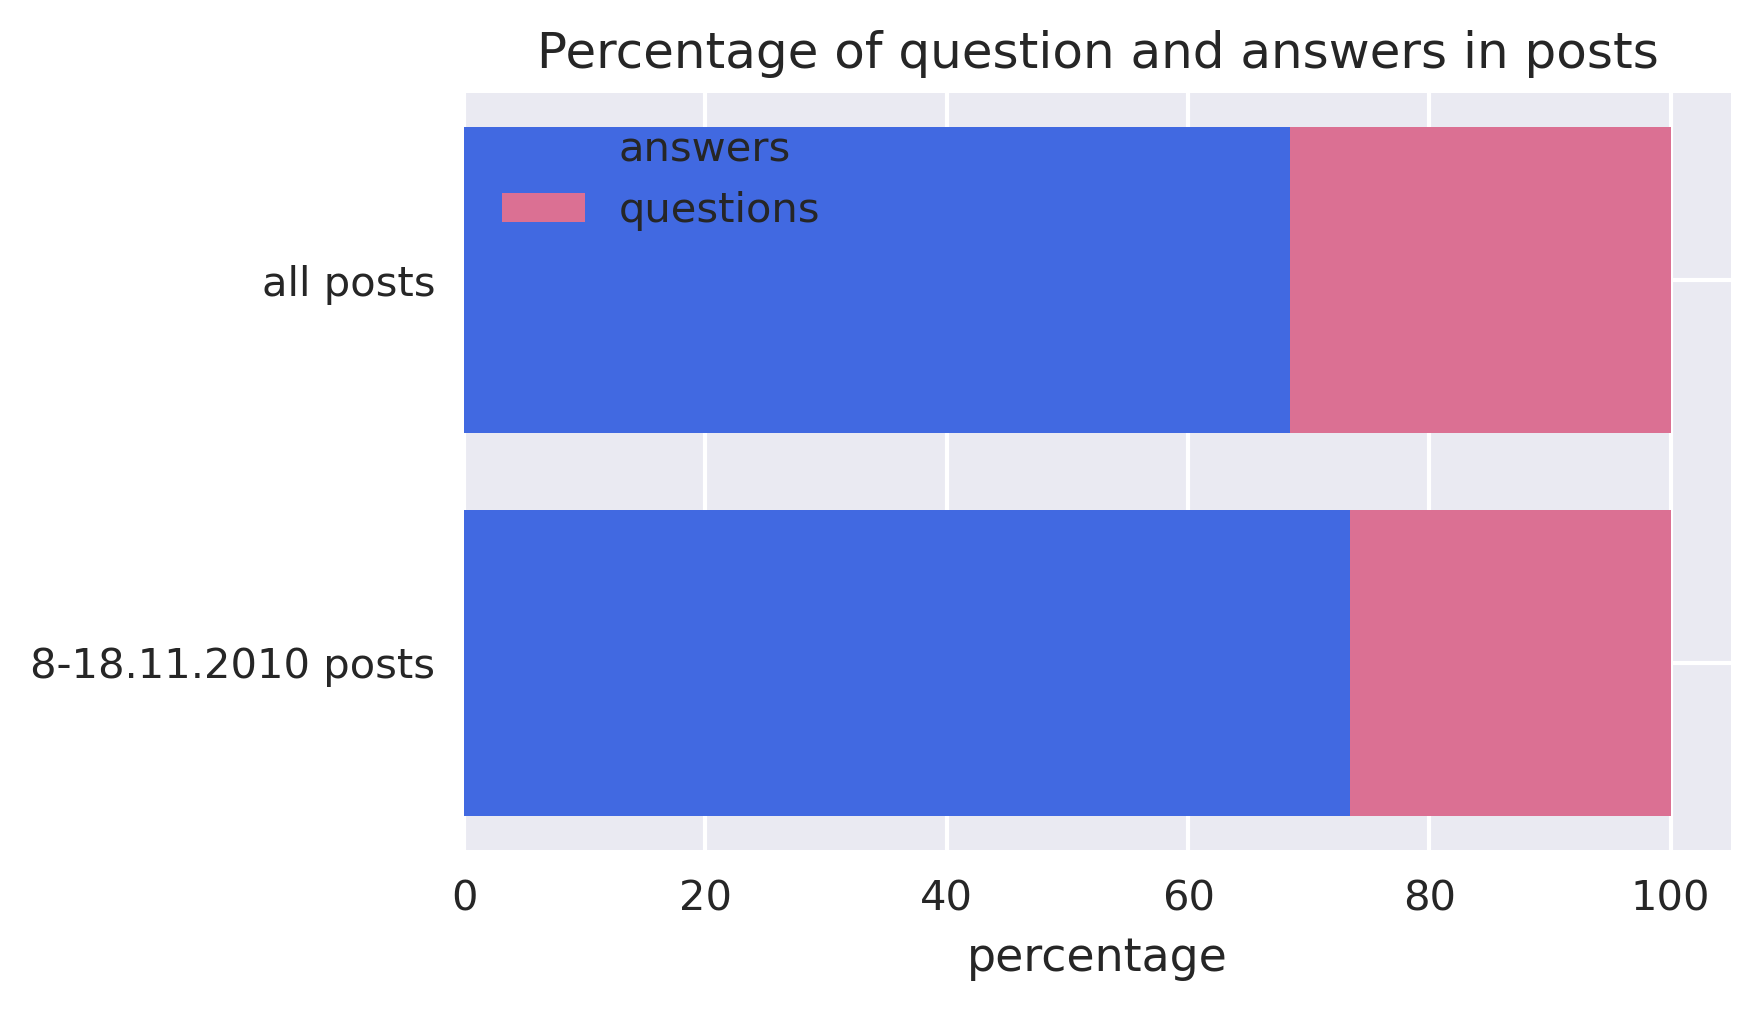

In [170]:
data_ranges = ['8-18.11.2010 posts','all posts']
y_pos = [1, 2]
a_perc = [top_a_perc, all_a_perc]

q_perc = [top_q_perc, all_q_perc]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(y_pos, a_perc, color='royalblue',label='answers')
ax.barh(y_pos, q_perc, left=a_perc, color='palevioletred',label='questions')
ax.set_yticks(y_pos, labels=data_ranges)
ax.set_xlabel('percentage')
ax.set_title('Percentage of question and answers in posts')
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Najaktywniejsi autorzy postów

In [171]:
colors_bland = cm.Set3(np.arange(20))
colors_vibrant = np.concatenate((cm.Set1(np.arange(6)), cm.Set2(np.arange(6))))

In [172]:
def circle_top10_authors_of_questions(posts_high, startangle, colors, title):
    authors_high = pd.merge(\
        left=posts_high.loc[:, ("Id", "Type of post", "OwnerUserId")],\
        right=users.loc[:, ("Id", "DisplayName")], \
        left_on='OwnerUserId', \
        right_on='Id')
    authors_high = authors_high.loc[:, ("Type of post", "DisplayName")]

    qora = authors_high.groupby("Type of post")
    
    q = qora.get_group("Question")
    q = q.groupby("DisplayName").size().to_frame('PostCount')
    q_all_count = q["PostCount"].sum();
    q = q.sort_values(by="PostCount", ascending=False).head(10)
    q_head_count = q["PostCount"].sum();

    row = pd.Series({'PostCount':q_all_count-q_head_count}, name="<Others>")
    q = q.append(row)


    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

    wedges, texts = ax.pie(q.PostCount, wedgeprops=dict(width=0.5), startangle=startangle, \
        colors=colors)

    bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
            bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(q.index[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.5*y),
                    horizontalalignment=horizontalalignment, **kw)

    ax.set_title(title)

    plt.show()

C:\Users\01151576\AppData\Local\Temp\ipykernel_18576\4054289865.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  q = q.append(row)


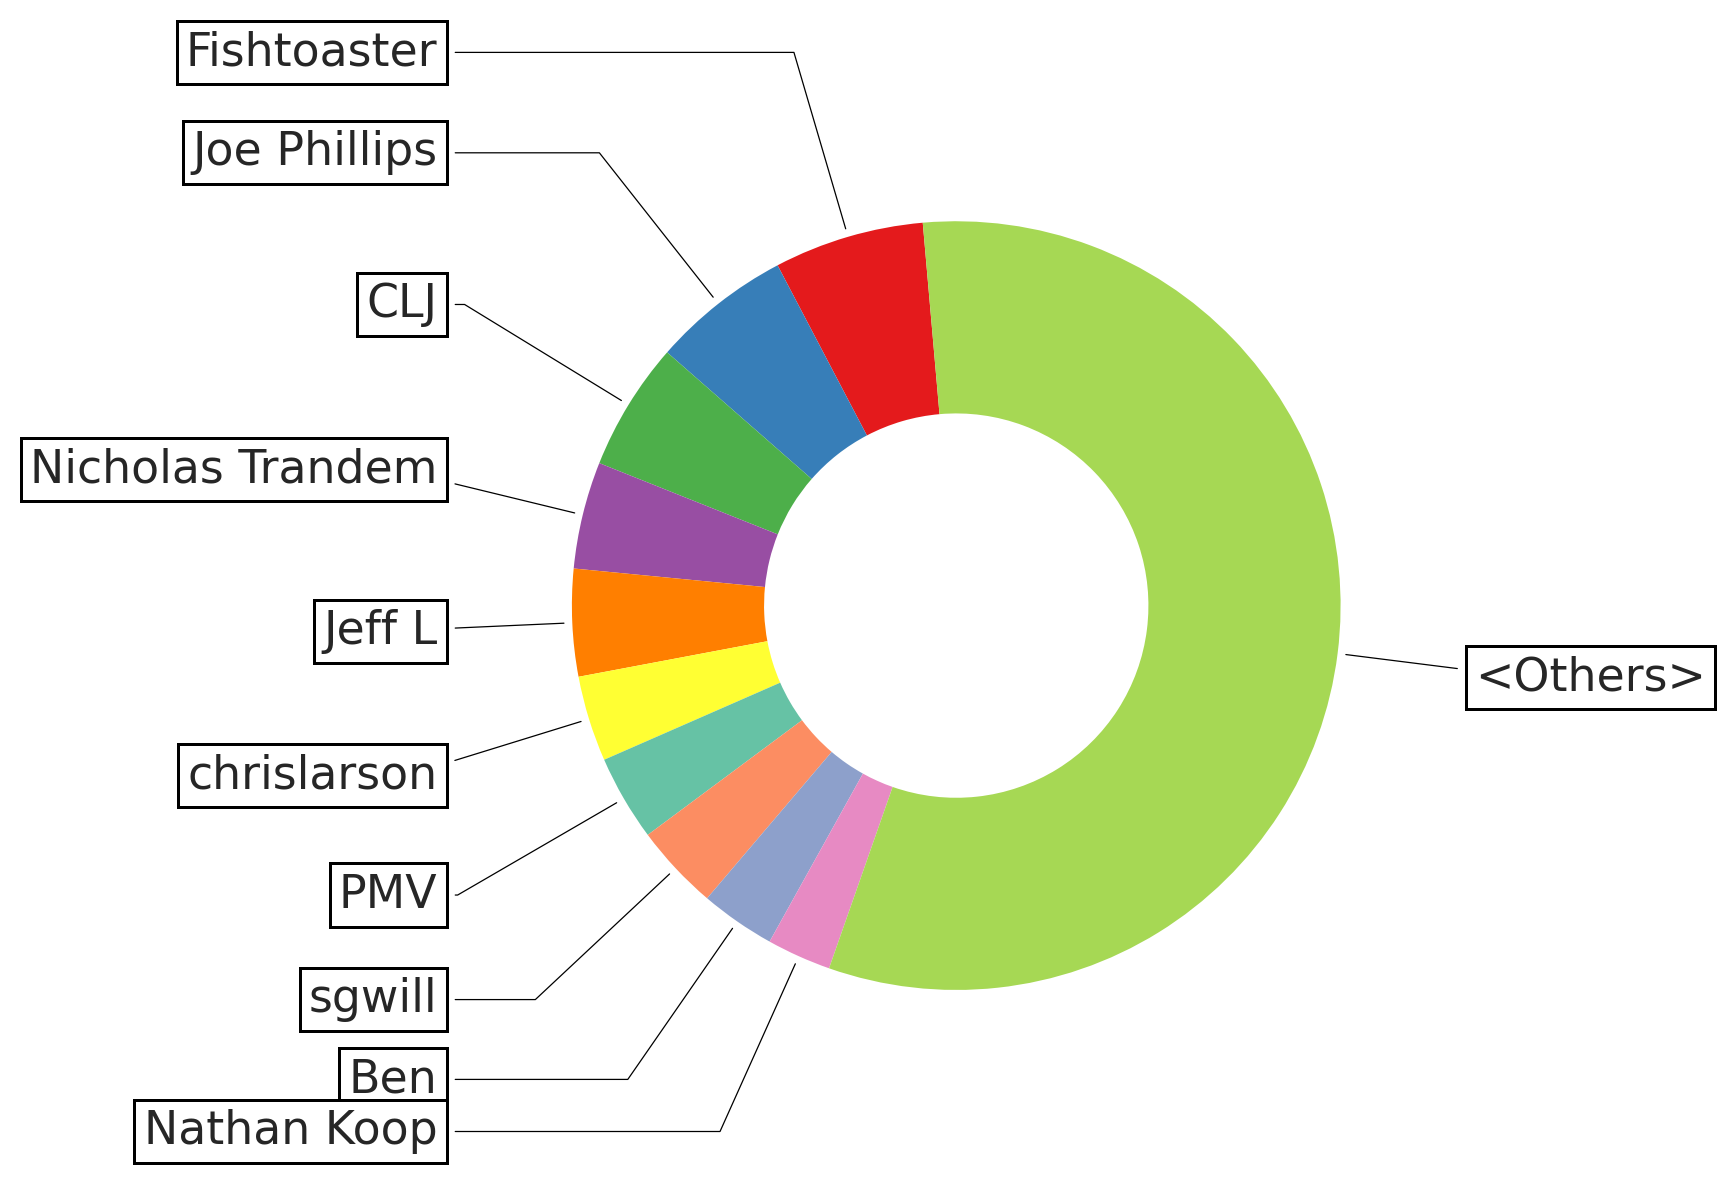

C:\Users\01151576\AppData\Local\Temp\ipykernel_18576\4054289865.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  q = q.append(row)


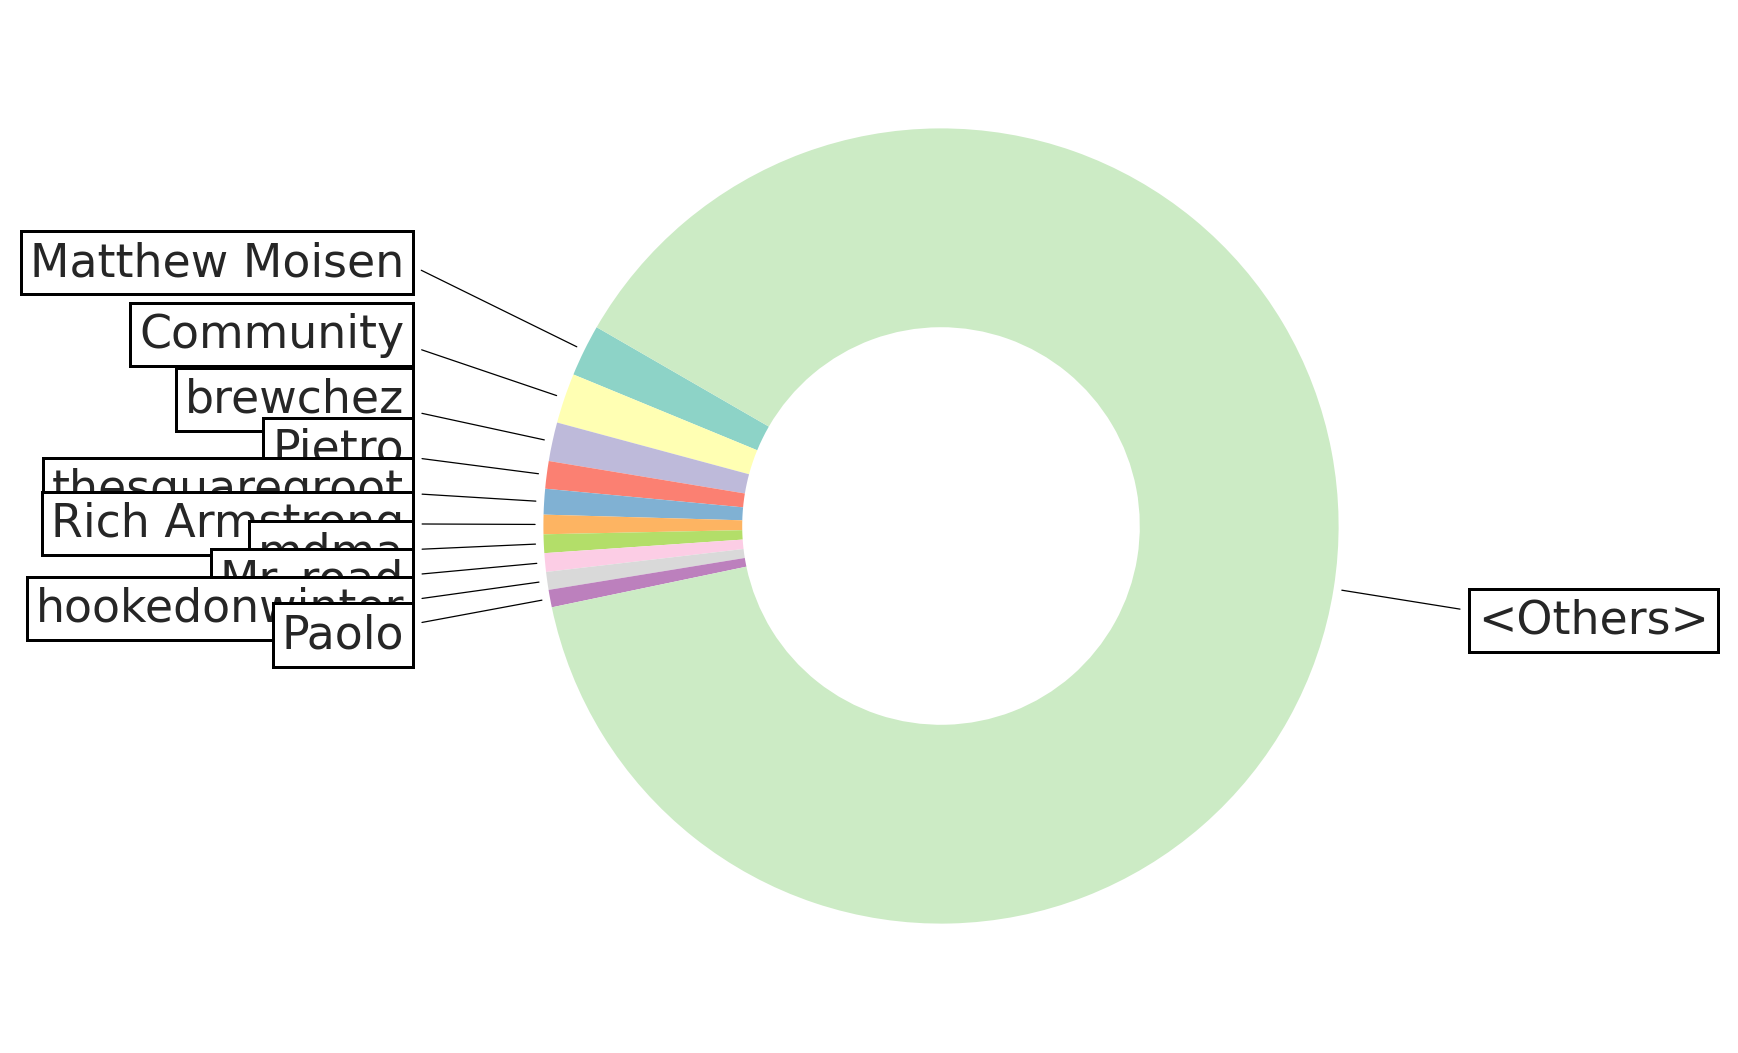

In [173]:
circle_top10_authors_of_questions(posts_high=posts_high, startangle=95, colors=colors_vibrant, title="")
circle_top10_authors_of_questions(posts_high=posts_all, startangle=150, colors=colors_bland, title="")

In [174]:
def circle_top10_authors_of_answers(posts_high, startangle, colors, title=""):
    authors_high = pd.merge(\
        left=posts_high.loc[:, ("Id", "Type of post", "OwnerUserId")],\
        right=users.loc[:, ("Id", "DisplayName")], \
        left_on='OwnerUserId', \
        right_on='Id')
    authors_high = authors_high.loc[:, ("Type of post", "DisplayName")]

    qora = authors_high.groupby("Type of post")
    
    a = qora.get_group("Answer")
    a = a.groupby("DisplayName").size().to_frame('PostCount')
    a_all_count = a["PostCount"].sum();
    a = a.sort_values(by="PostCount", ascending=False).head(10)
    a_head_count = a["PostCount"].sum();

    row = pd.Series({'PostCount':a_all_count-a_head_count}, name="<Others>")
    a = a.append(row)


    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

    wedges, texts = ax.pie(a.PostCount, wedgeprops=dict(width=0.5), startangle=startangle, \
        colors=colors)

    bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
            bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(a.index[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw)

    ax.set_title(title)

    plt.show()

C:\Users\01151576\AppData\Local\Temp\ipykernel_18576\3153100517.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append(row)


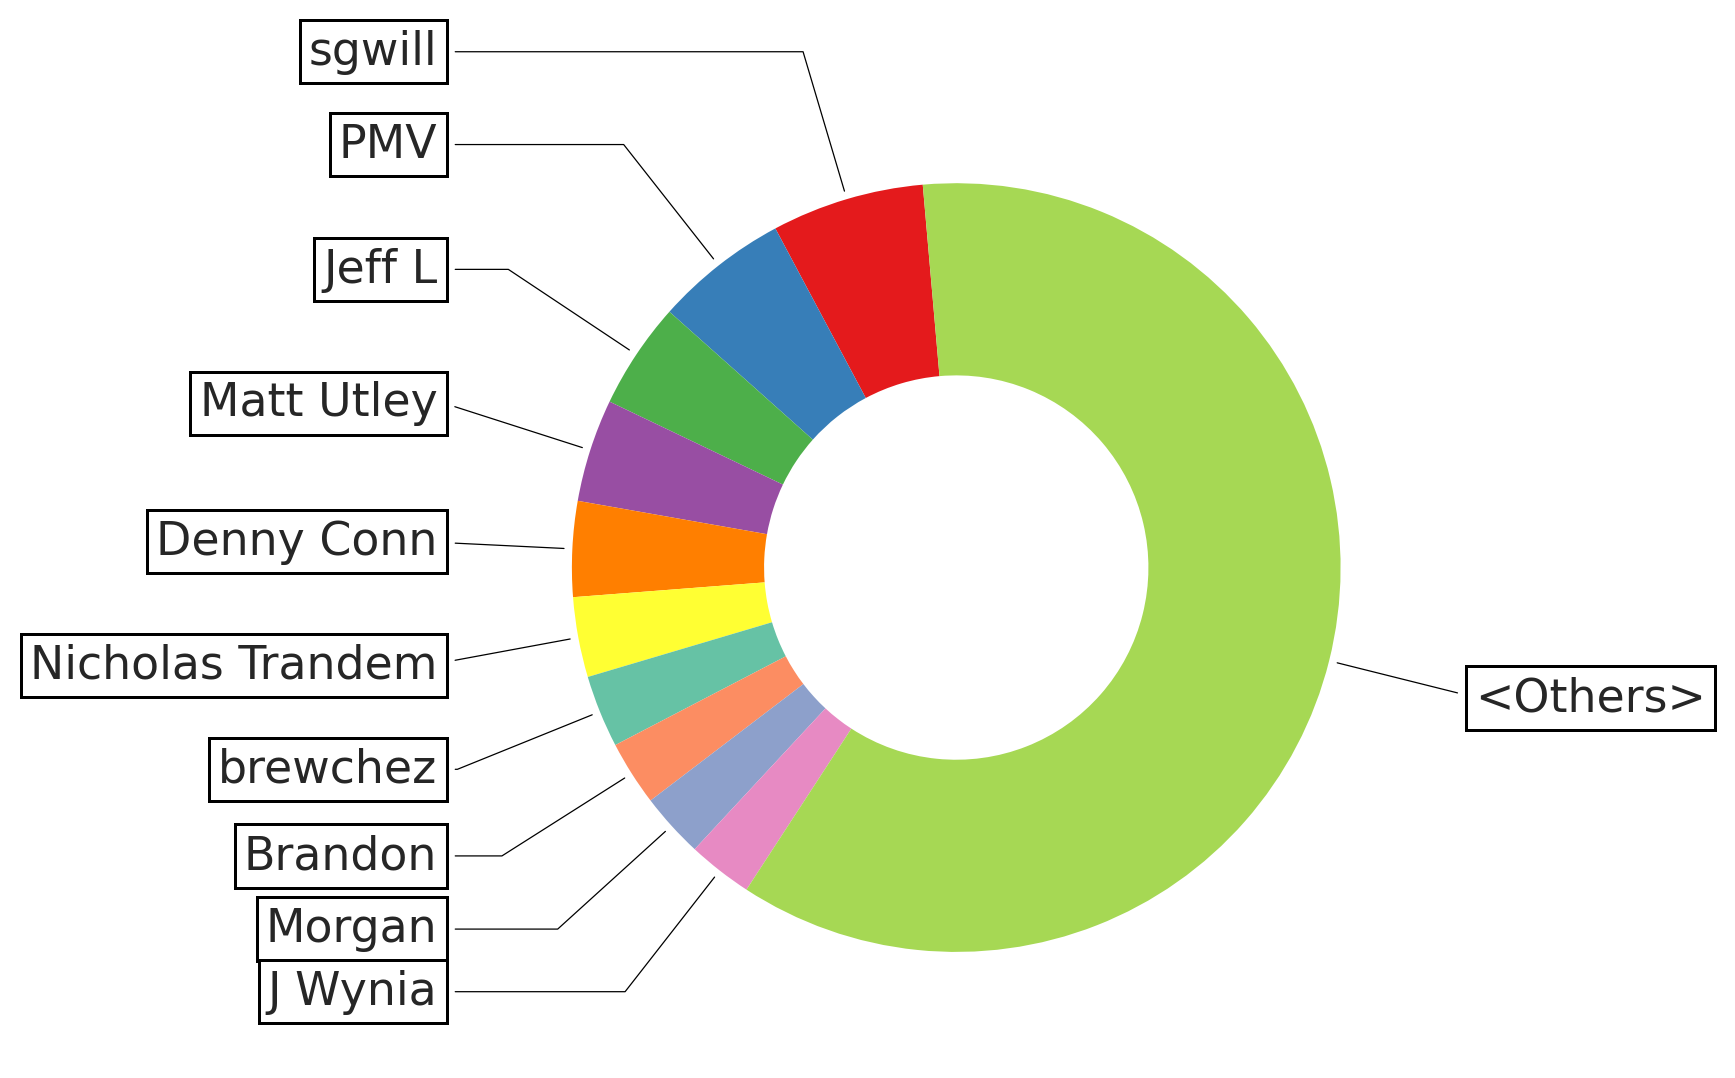

C:\Users\01151576\AppData\Local\Temp\ipykernel_18576\3153100517.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append(row)


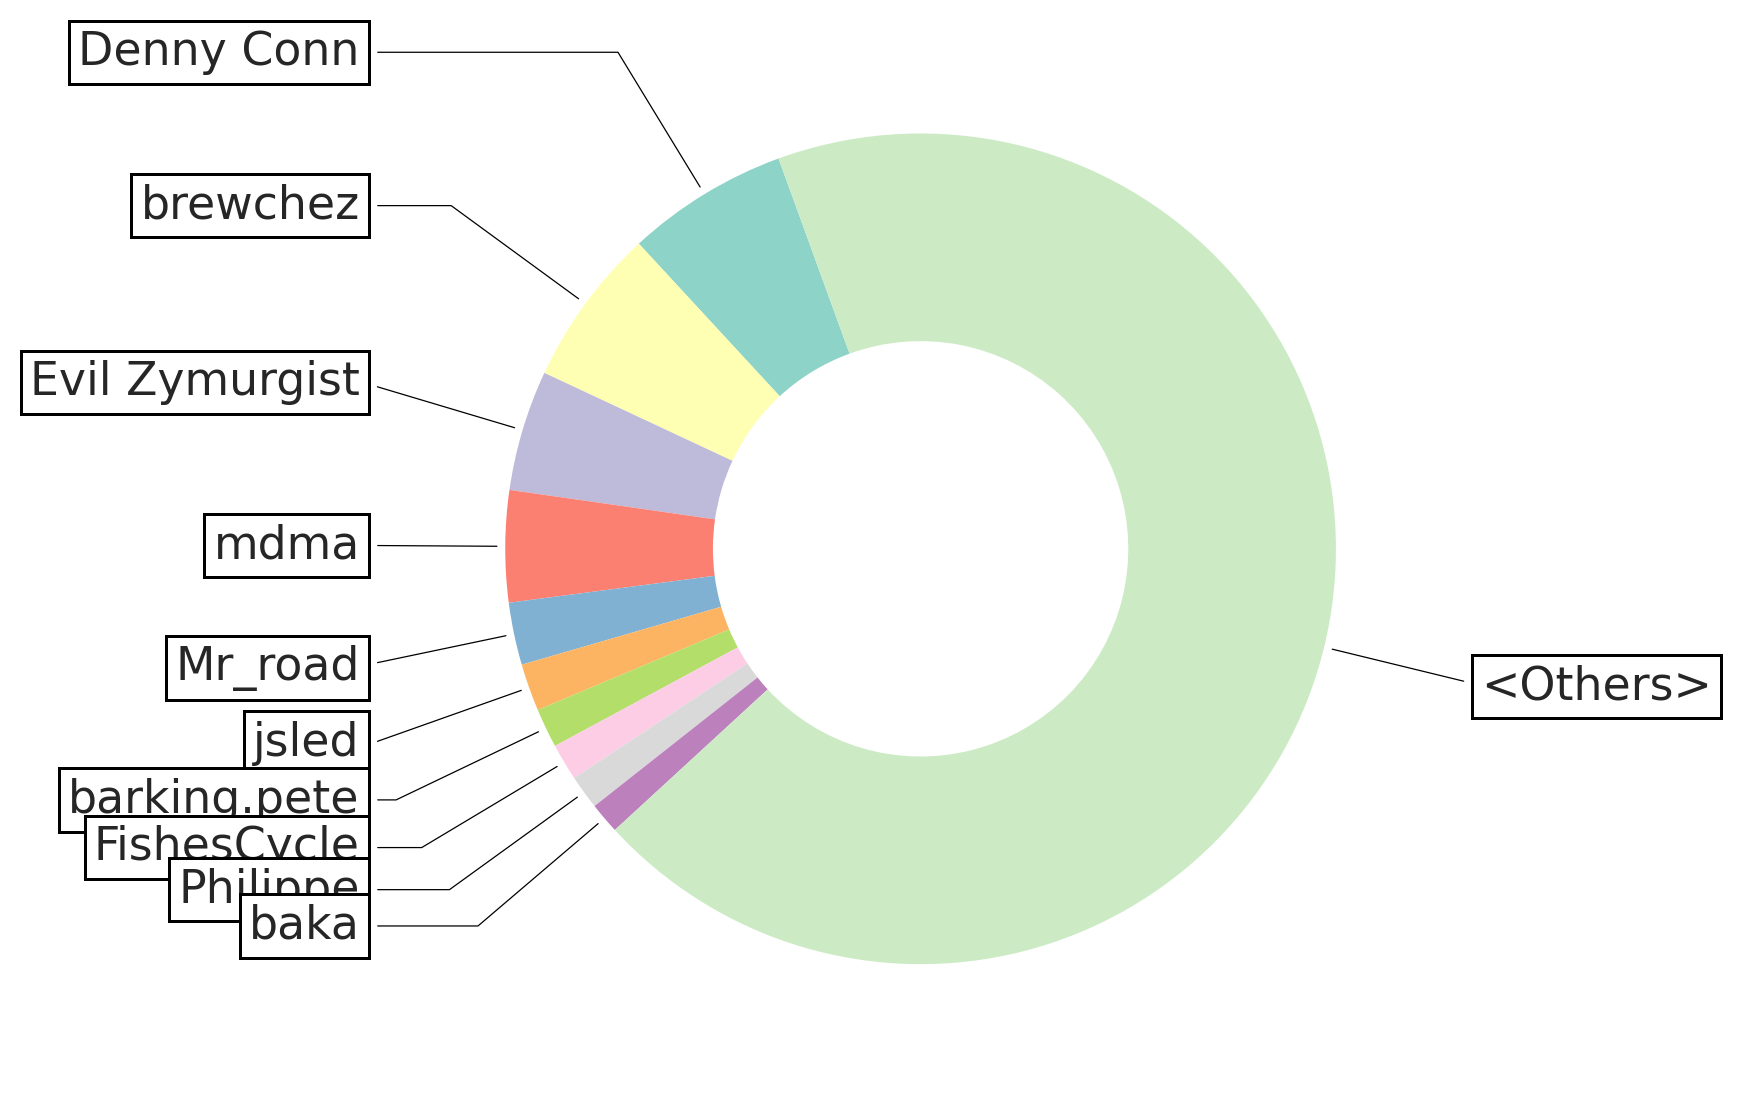

In [175]:
circle_top10_authors_of_answers(posts_high=posts_high, startangle=95, colors=colors_vibrant)
circle_top10_authors_of_answers(posts_high=posts_all, startangle=110, colors=colors_bland)